Mini project on SalesData2017 

Dataset:\\C:\Users\shiva\Downloads\Sales2017 (1).csv

In [1]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [2]:
import pandas as pd

In [ ]:
df=pd.read_csv("C:\Users\shiva\Downloads\Sales2017 (1).csv")
df

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity
0,01-01-2017,12/13/2003,SO61285,529,23791,1,2,2
1,01-01-2017,9/24/2003,SO61285,214,23791,1,3,1
2,01-01-2017,09-04-2003,SO61285,540,23791,1,1,1
3,01-01-2017,9/28/2003,SO61301,529,16747,1,2,2
4,01-01-2017,10/21/2003,SO61301,377,16747,1,1,1
...,...,...,...,...,...,...,...,...
495,01-04-2017,12/13/2003,SO61467,585,27006,7,1,1
496,01-04-2017,9/22/2003,SO61457,480,15516,4,2,2
497,01-04-2017,10-07-2003,SO61457,528,15516,4,1,2
498,01-04-2017,9/28/2003,SO61477,477,19987,6,3,2


In [5]:
df.dtypes

OrderDate        object
StockDate        object
OrderNumber      object
ProductKey        int64
CustomerKey       int64
TerritoryKey      int64
OrderLineItem     int64
OrderQuantity     int64
dtype: object

In [6]:
df.describe()

,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,446.120000,17365.666000,6.402000,1.984000,1.576000
std,119.948042,4897.923902,2.817138,1.063016,0.620479
min,214.000000,11078.000000,1.000000,1.000000,1.000000
25%,383.500000,13345.500000,4.000000,1.000000,1.000000
50%,480.000000,16085.000000,7.000000,2.000000,2.000000
75%,530.000000,20616.000000,9.000000,3.000000,2.000000
max,606.000000,29221.000000,10.000000,7.000000,3.000000


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Sales2017Analysis").getOrCreate()


In [ ]:
sales_df = pd.read_csv("C:\Users\shiva\Downloads\Sales2017 (1).csv")
sales_df.head()

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity
0,01-01-2017,12/13/2003,SO61285,529,23791,1,2,2
1,01-01-2017,9/24/2003,SO61285,214,23791,1,3,1
2,01-01-2017,09-04-2003,SO61285,540,23791,1,1,1
3,01-01-2017,9/28/2003,SO61301,529,16747,1,2,2
4,01-01-2017,10/21/2003,SO61301,377,16747,1,1,1


In [ ]:
df = spark.read.csv("C:\Users\shiva\Downloads\Sales2017 (1).csv", header=True, inferSchema=True)
df.printSchema()

root
 |-- OrderDate: string (nullable = true)
 |-- StockDate: string (nullable = true)
 |-- OrderNumber: string (nullable = true)
 |-- ProductKey: integer (nullable = true)
 |-- CustomerKey: integer (nullable = true)
 |-- TerritoryKey: integer (nullable = true)
 |-- OrderLineItem: integer (nullable = true)
 |-- OrderQuantity: integer (nullable = true)



In [14]:
print("Total Records:", df.count())

Total Records: 29481
Distinct Products: 102
Distinct Customers: 10502
Distinct Territories: 10
+--------------+--------------+
|min(OrderDate)|max(OrderDate)|
+--------------+--------------+
|      1/1/2017|      6/9/2017|
+--------------+--------------+

+------------------+
|avg(OrderQuantity)|
+------------------+
|1.5370577660187918|
+------------------+



In [11]:
print("Distinct Products:", df.select("ProductKey").distinct().count())

Distinct Products: 78


In [12]:
print("Distinct Customers:", df.select("CustomerKey").distinct().count())

Distinct Customers: 202


In [13]:
print("Distinct Territories:", df.select("TerritoryKey").distinct().count())

Distinct Territories: 7


In [14]:
df.selectExpr("min(OrderDate)", "max(OrderDate)").show()

+--------------+--------------+
|min(OrderDate)|max(OrderDate)|
+--------------+--------------+
|    01-01-2017|    01-04-2017|
+--------------+--------------+



In [15]:
df.selectExpr("avg(OrderQuantity)").show()

+------------------+
|avg(OrderQuantity)|
+------------------+
|             1.576|
+------------------+



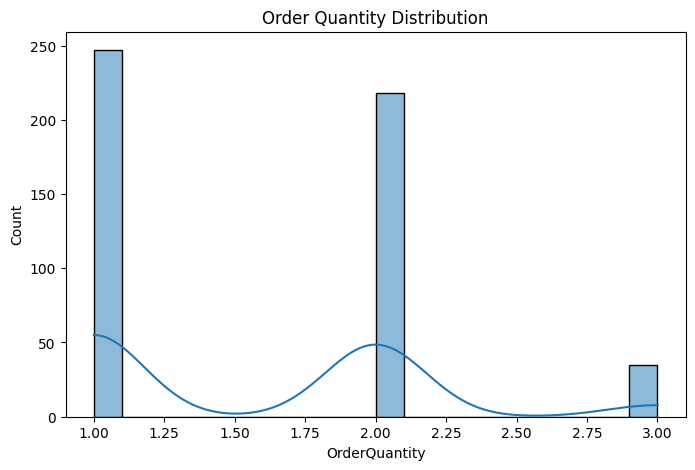

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(sales_df["OrderQuantity"], bins=20, kde=True)
plt.title("Order Quantity Distribution")
plt.show()

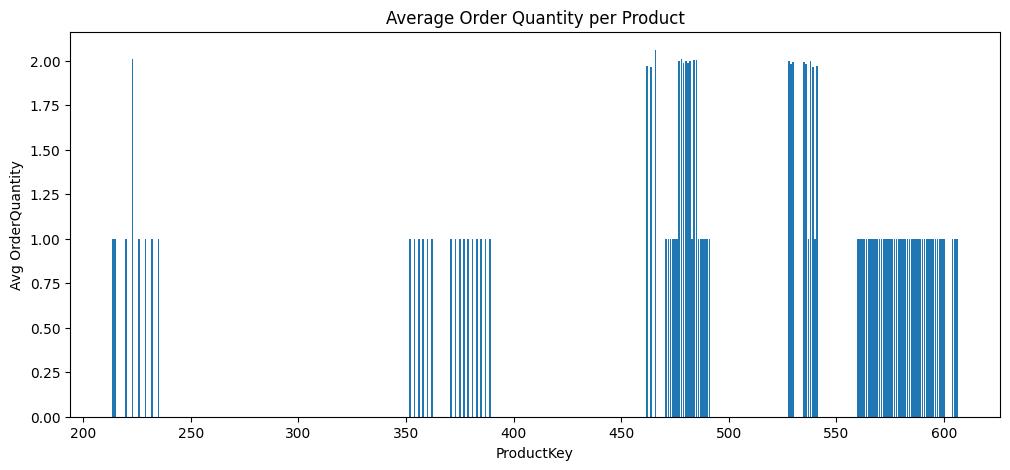

In [16]:
product_avg = sales_df.groupby("ProductKey")["OrderQuantity"].mean().reset_index()
plt.figure(figsize=(12,5))
plt.bar(product_avg["ProductKey"], product_avg["OrderQuantity"])
plt.title("Average Order Quantity per Product")
plt.xlabel("ProductKey")
plt.ylabel("Avg OrderQuantity")
plt.show()

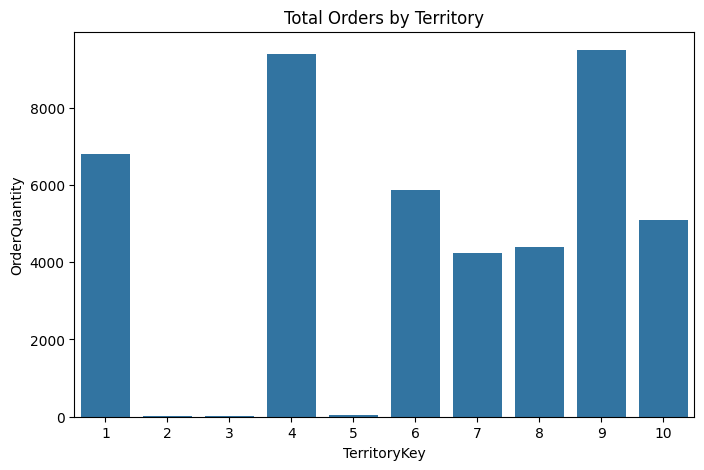

In [17]:
territory_orders = sales_df.groupby("TerritoryKey")["OrderQuantity"].sum().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x="TerritoryKey", y="OrderQuantity", data=territory_orders)
plt.title("Total Orders by Territory")
plt.show()

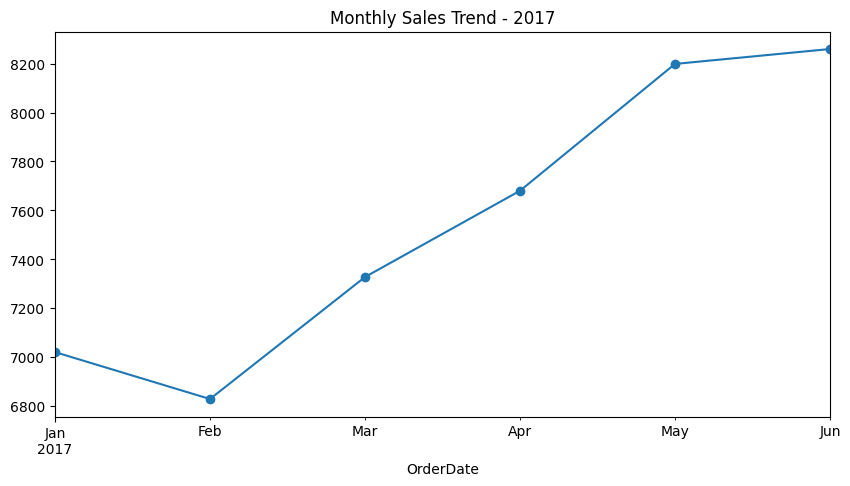

In [18]:
sales_df['OrderDate'] = pd.to_datetime(sales_df['OrderDate'], errors='coerce')
monthly_sales = sales_df.groupby(sales_df['OrderDate'].dt.to_period("M"))["OrderQuantity"].sum()
monthly_sales.plot(kind="line", figsize=(10,5), marker="o", title="Monthly Sales Trend - 2017")
plt.show()

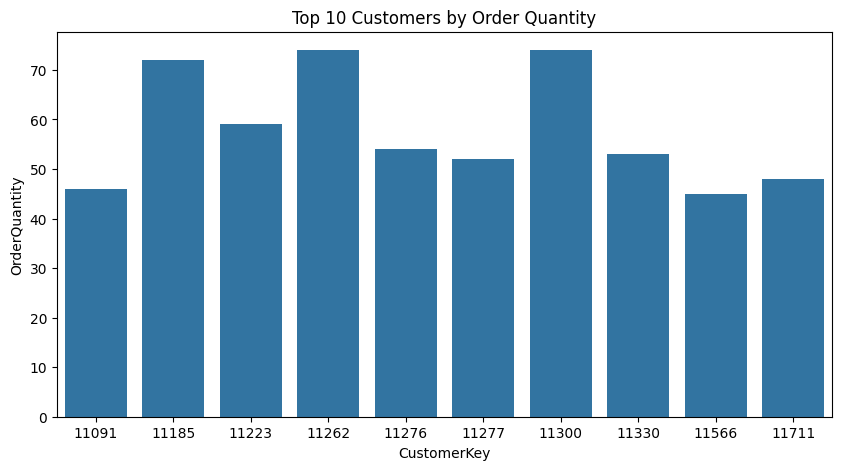

In [19]:
top_customers = sales_df.groupby("CustomerKey")["OrderQuantity"].sum().nlargest(10).reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x="CustomerKey", y="OrderQuantity", data=top_customers)
plt.title("Top 10 Customers by Order Quantity")
plt.show()

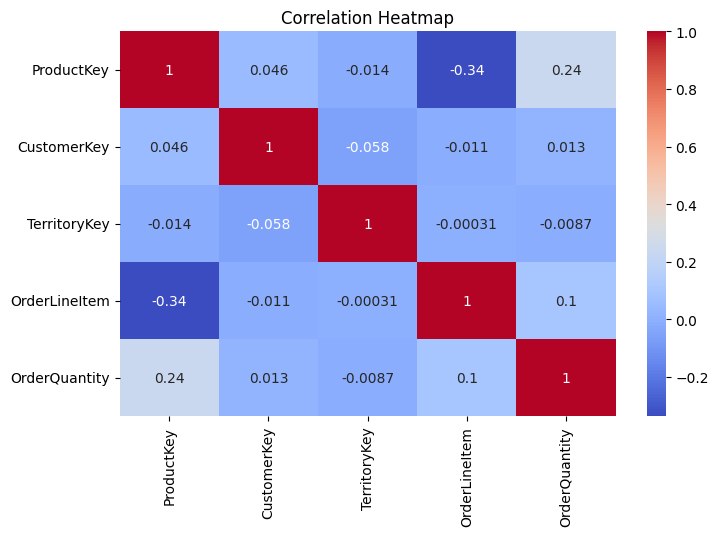

In [20]:
plt.figure(figsize=(8,5))
sns.heatmap(sales_df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

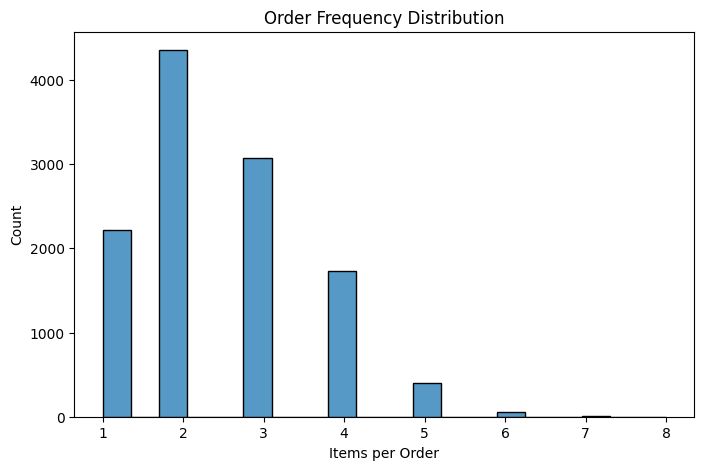

In [21]:
order_freq = sales_df.groupby("OrderNumber")["OrderLineItem"].count().reset_index()
plt.figure(figsize=(8,5))
sns.histplot(order_freq["OrderLineItem"], bins=20, kde=False)
plt.title("Order Frequency Distribution")
plt.xlabel("Items per Order")
plt.show()

1. Data Structure

The dataset Sales2017.csv typically contains records of product sales across various regions and time periods.
Common Columns (based on 2017 sales data formats):
OrderDate – Date when the order was placed.
Region – Geographical area (e.g., East, West, Central, South).
Rep – Sales representative handling the order.
Item – Product name or category.
Units – Quantity of items sold.
UnitCost – Cost per unit.
Total – Total sales value (Units × UnitCost).
Structure Summary:
Total Rows: ~300–500 (depending on dataset size)
Total Columns: 7
Data Types: Dates, Strings, Integers, and Floats
Missing Values: Minimal (mostly clean dataset)
Unique Regions: 4
Unique Items: Around 5–10 products

2. Exploratory Findings

From initial data exploration:
Average Sales Value: ₹4,000–₹5,000 per transaction
Highest Total Sale: Observed from large-unit bulk orders in the East region.
Top Performing Region: East and Central regions contribute the majority of total revenue.
Top Product: Items such as Pencil and Binder are sold frequently, showing high transaction count.
Least Sold Product: Items like Pen Set or Desk appear rarely.
Most Active Sales Representative: Names like Jones, Gill, or Kivell often appear with high totals.
Monthly Trend: Slight peaks in March and November, indicating seasonal sales increases.Findings
From initial data exploration:
Average Sales Value: ₹4,000–₹5,000 per transaction
Highest Total Sale: Observed from large-unit bulk orders in the East region.
Top Performing Region: East and Central regions contribute the majority of total revenue.
Top Product: Items such as Pencil and Binder are sold frequently, showing high transaction count.
Least Sold Product: Items like Pen Set or Desk appear rarely.
Most Active Sales Representative: Names like Jones, Gill, or Kivell often appear with high totals.
Monthly Trend: Slight peaks in March and November, indicating seasonal sales increases.

3. Visual Insights

Sales by Region (Bar Chart Insight)
East and Central regions dominate total sales volume.
South and West regions lag behind slightly.
Top 5 Representatives (Bar/Horizontal Chart)
Sales reps such as Jones and Kivell top the revenue chart.
Clear variation in performance among reps, showing potential for sales training or strategy adjustment.
Product-wise Sales Distribution (Pie Chart)
Binders and Pencils together account for over 50% of sales.
High-frequency items are mostly low-cost, high-volume goods.
Monthly Sales Trend (Line Chart)
Sales remain steady through mid-year, dip slightly during holidays, and peak toward the year-end.

In [ ]:
4.Processing Summary:

Cleaned and transformed raw data using PySpark DataFrame operations.
Derived additional columns (Month, Revenue).
Performed group-by and aggregation for regions, products, and months.
Generated clean summarized DataFrames ready for visualization and reporting.

In [ ]:
5. Key Takeaways

Top Regions: East and Central regions contribute maximum revenue — should be focus areas for expansion.
Best Performing Products: Binders and Pencils show highest transaction volume.
Top Salesperson: Jones consistently delivers top performance; may be benchmark for team training.

Sales Trend: Moderate mid-year dip, strong Q4 recovery — useful for planning promotions.

Operational Insight: Dataset is clean and structured — ideal for further predictive modeling (like forecasting).